## Import the files

### training dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/'
file1 = 'Features_S0.xlsx'
file2 = 'Features_A0.xlsx'
filepath1 = path + file1
filepath2 = path + file2

X_S0 = pd.read_excel(filepath1)
X_A0 = pd.read_excel(filepath2)
X = pd.concat([X_S0, X_A0], axis=1)
print(X.shape)

(9870, 12)


In [2]:
folder = 'StoreResults/Dataset/GenMaterials/'
filename = path + folder + 'Labels.txt'
y = pd.read_csv(filename, header = None)
print(y.shape)
y.head()

(9870, 6)


,0,1,2,3,4,5
0,1512.03,146489901719,6582205626,5694692252,0.3567,0.2544
1,1512.03,146489901719,6582205626,5694692252,0.3567,0.2544
2,1512.03,146489901719,6582205626,5694692252,0.3567,0.2544
3,1512.03,146489901719,6582205626,5694692252,0.3567,0.2544
4,1512.03,146489901719,6582205626,5694692252,0.3567,0.2544


In [3]:
X.head()

,MajorAxis,MinorAxis,AspectRatio,Area,Perimeter,Circularity,MajorAxis,MinorAxis,AspectRatio,Area,Perimeter,Circularity
0,327.658092,72.447523,4.522696,18639,692.704,0.488132,161.458345,84.391528,1.913206,10677,396.672,0.852700
1,327.626941,72.423517,4.523765,18631,692.704,0.487922,197.593153,110.276778,1.791793,17088,494.096,0.879586
2,327.599177,72.406604,4.524438,18625,692.704,0.487765,213.517153,125.815932,1.697060,21078,541.848,0.902162
3,327.540985,72.377119,4.525477,18614,692.704,0.487477,220.568771,136.147144,1.620076,23570,567.858,0.918523
4,327.576034,72.334349,4.528637,18605,692.704,0.487241,223.889424,143.333954,1.562012,25193,582.488,0.933073


In [4]:
rho = y.iloc[:,0:1]/100     # in (g/cm3)/10
E1 = y.iloc[:,1:2]*1e-9     # in GPa
E2 = y.iloc[:,2:3]*1e-9     # in GPa
G12 = y.iloc[:,3:4]*1e-9    # in GPa
v12 = y.iloc[:,4:5]*100     # in %
v23 = y.iloc[:,5:6]*100     # in %
yn = pd.concat([rho,E1,E2,G12,v12,v23],axis=1)
ym = np.array(yn)
ym.shape

(9870, 6)

### prediction dataset

In [5]:
path = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/'
file1 = 'Features_S0_DC.xlsx'
file2 = 'Features_A0_DC.xlsx'
filepath1 = path + file1
filepath2 = path + file2

X_S0 = pd.read_excel(filepath1)
X_A0 = pd.read_excel(filepath2)

X_test2 = pd.concat([X_S0, X_A0], axis=1)
print(X_test2.shape)
X_test2.head()

(100, 12)


,MajorAxis,MinorAxis,AspectRatio,Area,Perimeter,Circularity,MajorAxis,MinorAxis,AspectRatio,Area,Perimeter,Circularity
0,313.885065,82.395786,3.809480,20235,689.480,0.534896,160.345179,93.029821,1.723589,11682,406.134,0.889997
1,313.924933,82.333347,3.812853,20223,689.480,0.534579,197.546792,122.940804,1.606845,19038,510.670,0.917383
2,313.956139,82.274592,3.815955,20211,689.480,0.534262,214.298258,141.575318,1.513670,23799,564.592,0.938208
3,314.016999,82.200568,3.820132,20198,689.480,0.533918,222.077694,154.409196,1.438241,26910,595.134,0.954760
4,314.035161,82.137637,3.823280,20185,688.504,0.535089,225.927337,163.607534,1.380910,29015,615.628,0.962046


In [6]:
folder = 'StoreResults/Dataset/MaterialsFromDC/'
filename = path + folder + 'Labels190.txt'
y_test2 = pd.read_csv(filename, header = None)
print(y_test2.shape)
y_test2.head()

(100, 6)


,0,1,2,3,4,5
0,1550,1.446460e+11,9.635564e+09,6000000000,0.29927,0.284742
1,1550,1.446460e+11,9.635564e+09,6000000000,0.29927,0.284742
2,1550,1.446460e+11,9.635564e+09,6000000000,0.29927,0.284742
3,1550,1.446460e+11,9.635564e+09,6000000000,0.29927,0.284742
4,1550,1.446460e+11,9.635564e+09,6000000000,0.29927,0.284742


In [7]:
rho = y_test2.iloc[:,0:1]/100     # in (g/cm3)/10
E1 = y_test2.iloc[:,1:2]*1e-9     # in GPa
E2 = y_test2.iloc[:,2:3]*1e-9     # in GPa
G12 = y_test2.iloc[:,3:4]*1e-9    # in GPa
v12 = y_test2.iloc[:,4:5]*100     # in %
v23 = y_test2.iloc[:,5:6]*100     # in %
yn2 = pd.concat([rho,E1,E2,G12,v12,v23],axis=1)
ym2 = np.array(yn2)
ym2.shape

(100, 6)

### Metrics

In [8]:
from keras import backend as K

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def APD(y_true, y_pred):
    diff = y_pred - y_true
    percentDiff = (diff / y_true) * 100
    absPercentDiff = np.abs(percentDiff)
    APD = pd.DataFrame(absPercentDiff)
    APD = round(APD,2)
    return np.array(APD)

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

Using TensorFlow backend.


## ML algorithms

In [9]:
def SVMregress(X, y, X_test2, y_test2, svrtype):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_test2_scaled = scaler.transform(X_test2)

    from sklearn.svm import SVR
    
    if (svrtype == 1): # SVR with Radial bias function
        svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)
        history = svr_rbf.fit(X_train_scaled, y_train)
    elif (svrtype == 2): # SVR with linear function
        svr_lin = SVR(kernel='linear', C=10, gamma='auto')
        history = svr_lin.fit(X_train_scaled, y_train)
    elif (svrtype == 3):# SVR with polynomial function
        svr_poly = SVR(kernel='poly', C=10, gamma='auto', degree=3, epsilon=.1, coef0=1)
        history = svr_poly.fit(X_train_scaled, y_train)
    
    y_pred = history.predict(X_test_scaled)
    y_pred2 = history.predict(X_test2_scaled)
    
    apd1 = APD(y_test, y_pred)
    apd2 = APD(y_test2, y_pred2)
    
    return apd1,apd2

In [10]:
def LinRegress(X, y, X_test2, y_test2, lintype):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_test2_scaled = scaler.transform(X_test2)
    
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    
    # fit
    if (lintype == 1): # Linear Regression
        linreg = LinearRegression().fit(X_train_scaled, y_train)
        history = linreg
    elif (lintype == 2): # Ridge Regression
        linridge = Ridge(alpha = 20.0).fit(X_train_scaled, y_train)
        history = linridge
    elif (lintype == 3):# Lasso Regression
        linlasso = Lasso(alpha = 2.0, max_iter = 10000).fit(X_train_scaled, y_train)
        history = linlasso
        
    # predict
    y_pred = history.predict(X_test_scaled)
    y_pred2 = history.predict(X_test2_scaled)
    
    apd1 = APD(y_test, y_pred)
    apd2 = APD(y_test2, y_pred2)
    
    return apd1,apd2

In [11]:
def RandomForestRegress(X, y, X_test2, y_test2):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_test2_scaled = scaler.transform(X_test2)
    
    from sklearn.ensemble import RandomForestRegressor
    
    # fit
    RFregressor = RandomForestRegressor(n_estimators = 30, random_state = 42)
    history = RFregressor.fit(X_train_scaled, y_train)   
    
    # predict
    y_pred = history.predict(X_test_scaled)
    y_pred2 = history.predict(X_test2_scaled)
    
    apd1 = APD(y_test, y_pred)
    apd2 = APD(y_test2, y_pred2)
    
    return apd1,apd2

In [12]:
def ANNregress(X, y, X_test2, y_test2, LR, neurons, nb, ep):
    
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation, Dropout
    from tensorflow.keras.optimizers import SGD, Adam, RMSprop
    
    from tensorflow.compat.v1 import ConfigProto 
    from tensorflow.compat.v1 import InteractiveSession
    config = ConfigProto()
    config.gpu_options.allow_growth = True
    session = InteractiveSession(config=config)
    
    X = np.array(X)
    y = np.array(y)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
    
    
    # architecture of model
    model = Sequential()
    model.add(Dense(neurons, input_dim = X.shape[1], activation='relu'))
    model.add(Dense(y.shape[1], activation='linear'))
    
    # compile model
    model.compile(loss='mse', optimizer=Adam(lr=LR), metrics=['mae', 'mape', r_square])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = nb, epochs=ep, shuffle = True)
    
    # predict
    y_pred = model.predict(X_test)
    y_pred2 = model.predict(X_test2)
    
    apd1 = APD(y_test, y_pred)
    apd2 = APD(y_test2, y_pred2)
    
    return model, history, apd1, apd2

## Regression using ML

### SVM Regression

In [13]:
storeSVM1a = []
storeSVM2a = []
storeSVM3a = []
storeSVM1b = []
storeSVM2b = []
storeSVM3b = []

apdSVM1a = []
apdSVM2a = []
apdSVM3a = []
apdSVM1b = []
apdSVM2b = []
apdSVM3b = []

for i in range(0,y.shape[1],1):
    # APD for SVM = RBF
    [SVM1a,SVM1b] = SVMregress(X, yn.iloc[:,i], X_test2, yn2.iloc[:,i], svrtype = 1)
    storeSVM1a.append(SVM1a)
    storeSVM1b.append(SVM1b)
    
    # APD for SVM = Linear
    [SVM2a,SVM2b] = SVMregress(X, yn.iloc[:,i], X_test2, yn2.iloc[:,i], svrtype = 2)
    storeSVM2a.append(SVM2a)
    storeSVM2b.append(SVM2b)
    
    # APD for SVM = polynomial
    [SVM3a,SVM3b] = SVMregress(X, yn.iloc[:,i], X_test2, yn2.iloc[:,i], svrtype = 3)
    storeSVM3a.append(SVM3a)
    storeSVM3b.append(SVM3b)

apdSVM1a = np.concatenate(storeSVM1a,axis=1)
apdSVM2a = np.concatenate(storeSVM2a,axis=1)
apdSVM3a = np.concatenate(storeSVM3a,axis=1)
apdSVM1b = np.concatenate(storeSVM1b,axis=1)
apdSVM2b = np.concatenate(storeSVM2b,axis=1)
apdSVM3b = np.concatenate(storeSVM3b,axis=1)
print(apdSVM1a.shape)
print(apdSVM2a.shape)
print(apdSVM3a.shape)
print(apdSVM1b.shape)
print(apdSVM2b.shape)
print(apdSVM3b.shape)

(1481, 6)
(1481, 6)
(1481, 6)
(100, 6)
(100, 6)
(100, 6)


### Linear Regression

In [14]:
storeLR1a = []
storeLR2a = []
storeLR3a = []
storeLR1b = []
storeLR2b = []
storeLR3b = []

apdLR1a = []
apdLR2a = []
apdLR3a = []
apdLR1b = []
apdLR2b = []
apdLR3b = []

for i in range(0,y.shape[1],1):
    # APD for Linear Regression
    [LR1a,LR1b] = LinRegress(X, yn.iloc[:,i], X_test2, yn2.iloc[:,i], lintype = 1)
    storeLR1a.append(LR1a)
    storeLR1b.append(LR1b)
    
    # APD for Ridge Regression
    [LR2a,LR2b] = LinRegress(X, yn.iloc[:,i], X_test2, yn2.iloc[:,i], lintype = 2)
    storeLR2a.append(LR2a)
    storeLR2b.append(LR2b)
    
    # APD for Lasso polynomial
    [LR3a,LR3b] = LinRegress(X, yn.iloc[:,i], X_test2, yn2.iloc[:,i], lintype = 3)
    storeLR3a.append(LR3a)
    storeLR3b.append(LR3b)

apdLR1a = np.concatenate(storeLR1a,axis=1)
apdLR2a = np.concatenate(storeLR2a,axis=1)
apdLR3a = np.concatenate(storeLR3a,axis=1)
apdLR1b = np.concatenate(storeLR1b,axis=1)
apdLR2b = np.concatenate(storeLR2b,axis=1)
apdLR3b = np.concatenate(storeLR3b,axis=1)
print(apdLR1a.shape)
print(apdLR2a.shape)
print(apdLR3a.shape)
print(apdLR1b.shape)
print(apdLR2b.shape)
print(apdLR3b.shape)

(1481, 6)
(1481, 6)
(1481, 6)
(100, 6)
(100, 6)
(100, 6)


### Random Forest Regression

In [15]:
storeRF1 = []
storeRF2 = []
apdRF1 = []
apdRF2 = []

for i in range(0,y.shape[1],1):
    # APD for Random Forst
    [RF1,RF2] = RandomForestRegress(X, yn.iloc[:,i], X_test2, yn2.iloc[:,i])
    storeRF1.append(RF1)
    storeRF2.append(RF2)

apdRF1 = np.concatenate(storeRF1,axis=1)
apdRF2 = np.concatenate(storeRF2,axis=1)
print(apdRF1.shape)
print(apdRF2.shape)

(1481, 6)
(100, 6)


### ANN Regression

In [16]:
# APD for ANN
[model,hist,apdANN1,apdANN2] = ANNregress(X, yn, X_test2, yn2, LR = 1e-3, neurons = 2048, nb = 64, ep = 1000)

Train on 8389 samples, validate on 1481 samples
Epoch 1/1000
8389/8389 [==============================] - 1s 90us/sample - loss: 55263.3510 - mae: 86.7497 - mape: 566.9956 - r_square: -20.0363 - val_loss: 138.6938 - val_mae: 8.2367 - val_mape: 34.1712 - val_r_square: 0.9456
Epoch 2/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 137.2436 - mae: 7.9825 - mape: 30.6808 - r_square: 0.9462 - val_loss: 125.7256 - val_mae: 7.9007 - val_mape: 31.9025 - val_r_square: 0.9507
Epoch 3/1000
8389/8389 [==============================] - 0s 31us/sample - loss: 131.5402 - mae: 7.8929 - mape: 30.9515 - r_square: 0.9486 - val_loss: 173.1215 - val_mae: 8.2573 - val_mape: 25.9873 - val_r_square: 0.9319
Epoch 4/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 117.1930 - mae: 7.3790 - mape: 27.8059 - r_square: 0.9540 - val_loss: 262.6285 - val_mae: 10.7879 - val_mape: 31.8884 - val_r_square: 0.8963
Epoch 5/1000
8389/8389 [==============================] - 0s 

8389/8389 [==============================] - 0s 31us/sample - loss: 630.7006 - mae: 17.6666 - mape: 122.5393 - r_square: 0.7451 - val_loss: 2787.8531 - val_mae: 42.8343 - val_mape: 314.3377 - val_r_square: -0.1034
Epoch 38/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 695.2106 - mae: 18.9560 - mape: 114.8889 - r_square: 0.7275 - val_loss: 2013.4969 - val_mae: 37.5031 - val_mape: 223.5570 - val_r_square: 0.2091
Epoch 39/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 1371.2470 - mae: 23.5580 - mape: 135.9695 - r_square: 0.4648 - val_loss: 230.9282 - val_mae: 11.6348 - val_mape: 42.1339 - val_r_square: 0.9088
Epoch 40/1000
8389/8389 [==============================] - 0s 30us/sample - loss: 270.7853 - mae: 12.2740 - mape: 73.4950 - r_square: 0.8934 - val_loss: 1448.7808 - val_mae: 29.4172 - val_mape: 140.6644 - val_r_square: 0.4282
Epoch 41/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 562.3378 - mae: 17.7844 -

8389/8389 [==============================] - 0s 26us/sample - loss: 136.9121 - mae: 8.4331 - mape: 41.0151 - r_square: 0.9459 - val_loss: 789.2260 - val_mae: 24.1879 - val_mape: 118.5031 - val_r_square: 0.6868
Epoch 74/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 387.3732 - mae: 14.8149 - mape: 79.7689 - r_square: 0.8482 - val_loss: 229.7152 - val_mae: 11.0882 - val_mape: 51.9444 - val_r_square: 0.9090
Epoch 75/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 147.8575 - mae: 8.7793 - mape: 43.4505 - r_square: 0.9419 - val_loss: 155.8737 - val_mae: 8.5709 - val_mape: 31.4461 - val_r_square: 0.9376
Epoch 76/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 260.1106 - mae: 11.5079 - mape: 56.8169 - r_square: 0.8982 - val_loss: 345.5319 - val_mae: 14.0821 - val_mape: 54.4146 - val_r_square: 0.8641
Epoch 77/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 234.1927 - mae: 11.3171 - mape: 61.132

Epoch 110/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 128.9622 - mae: 8.6387 - mape: 47.8314 - r_square: 0.9498 - val_loss: 128.8654 - val_mae: 8.5779 - val_mape: 46.2803 - val_r_square: 0.9493
Epoch 111/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 128.4360 - mae: 8.5224 - mape: 45.6271 - r_square: 0.9497 - val_loss: 145.1270 - val_mae: 10.0362 - val_mape: 54.2937 - val_r_square: 0.9431
Epoch 112/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 108.0641 - mae: 7.6799 - mape: 37.7146 - r_square: 0.9577 - val_loss: 59.7357 - val_mae: 5.8246 - val_mape: 25.8121 - val_r_square: 0.9763
Epoch 113/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 89.2823 - mae: 6.9435 - mape: 33.3945 - r_square: 0.9650 - val_loss: 137.3665 - val_mae: 7.9085 - val_mape: 30.5907 - val_r_square: 0.9456
Epoch 114/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 129.9358 - mae: 8.7394 - m

Epoch 147/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 70.4186 - mae: 6.0931 - mape: 26.4976 - r_square: 0.9724 - val_loss: 114.0279 - val_mae: 7.3998 - val_mape: 28.4492 - val_r_square: 0.9557
Epoch 148/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 66.7909 - mae: 5.9530 - mape: 26.0563 - r_square: 0.9738 - val_loss: 155.5942 - val_mae: 8.3203 - val_mape: 25.3127 - val_r_square: 0.9382
Epoch 149/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 69.5660 - mae: 6.1467 - mape: 27.6112 - r_square: 0.9727 - val_loss: 152.8302 - val_mae: 9.2349 - val_mape: 35.8560 - val_r_square: 0.9390
Epoch 150/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 65.4568 - mae: 5.8462 - mape: 24.9989 - r_square: 0.9743 - val_loss: 57.5942 - val_mae: 5.3154 - val_mape: 21.4523 - val_r_square: 0.9770
Epoch 151/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 61.7753 - mae: 5.6857 - mape: 

8389/8389 [==============================] - 0s 27us/sample - loss: 52.8666 - mae: 5.0083 - mape: 17.7668 - r_square: 0.9793 - val_loss: 74.0215 - val_mae: 5.8629 - val_mape: 20.7264 - val_r_square: 0.9712
Epoch 185/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 54.0671 - mae: 5.0677 - mape: 18.0404 - r_square: 0.9787 - val_loss: 51.8678 - val_mae: 4.9299 - val_mape: 15.3677 - val_r_square: 0.9795
Epoch 186/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 52.6567 - mae: 4.9009 - mape: 16.1568 - r_square: 0.9793 - val_loss: 56.5703 - val_mae: 5.2024 - val_mape: 20.2722 - val_r_square: 0.9774
Epoch 187/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 53.1682 - mae: 4.9304 - mape: 16.6490 - r_square: 0.9791 - val_loss: 51.0545 - val_mae: 4.6977 - val_mape: 14.3208 - val_r_square: 0.9799
Epoch 188/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 53.1998 - mae: 4.9285 - mape: 16.5252 - r_square

8389/8389 [==============================] - 0s 27us/sample - loss: 51.3862 - mae: 4.7905 - mape: 15.2898 - r_square: 0.9799 - val_loss: 55.9177 - val_mae: 4.9928 - val_mape: 16.8979 - val_r_square: 0.9779
Epoch 222/1000
8389/8389 [==============================] - 0s 29us/sample - loss: 51.7402 - mae: 4.7996 - mape: 15.4185 - r_square: 0.9797 - val_loss: 52.4479 - val_mae: 4.8396 - val_mape: 15.0121 - val_r_square: 0.9793
Epoch 223/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 51.9505 - mae: 4.8262 - mape: 15.5244 - r_square: 0.9796 - val_loss: 56.4048 - val_mae: 4.8391 - val_mape: 13.4242 - val_r_square: 0.9774
Epoch 224/1000
8389/8389 [==============================] - 0s 29us/sample - loss: 49.5510 - mae: 4.6506 - mape: 14.3182 - r_square: 0.9805 - val_loss: 50.5516 - val_mae: 4.9627 - val_mape: 17.6187 - val_r_square: 0.9801
Epoch 225/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 51.0992 - mae: 4.7022 - mape: 14.3673 - r_square

8389/8389 [==============================] - 0s 26us/sample - loss: 49.1785 - mae: 4.6263 - mape: 14.2107 - r_square: 0.9807 - val_loss: 48.4066 - val_mae: 4.6379 - val_mape: 13.7134 - val_r_square: 0.9807
Epoch 259/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 49.4438 - mae: 4.6830 - mape: 14.8189 - r_square: 0.9806 - val_loss: 63.0110 - val_mae: 5.2042 - val_mape: 16.7225 - val_r_square: 0.9749
Epoch 260/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 49.4463 - mae: 4.7187 - mape: 15.3892 - r_square: 0.9806 - val_loss: 56.0239 - val_mae: 4.8034 - val_mape: 13.4961 - val_r_square: 0.9776
Epoch 261/1000
8389/8389 [==============================] - 0s 30us/sample - loss: 51.3891 - mae: 4.7163 - mape: 14.4479 - r_square: 0.9799 - val_loss: 57.7295 - val_mae: 4.8835 - val_mape: 13.6100 - val_r_square: 0.9768
Epoch 262/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 50.3082 - mae: 4.6717 - mape: 14.3091 - r_square

8389/8389 [==============================] - 0s 28us/sample - loss: 49.0447 - mae: 4.5936 - mape: 13.8806 - r_square: 0.9807 - val_loss: 52.2875 - val_mae: 4.6766 - val_mape: 14.7362 - val_r_square: 0.9794
Epoch 296/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 48.6669 - mae: 4.6070 - mape: 14.1859 - r_square: 0.9809 - val_loss: 48.7485 - val_mae: 4.7247 - val_mape: 15.1120 - val_r_square: 0.9808
Epoch 297/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 48.3382 - mae: 4.5609 - mape: 13.6645 - r_square: 0.9811 - val_loss: 49.5724 - val_mae: 4.6325 - val_mape: 14.3276 - val_r_square: 0.9804
Epoch 298/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 48.8257 - mae: 4.6177 - mape: 14.2660 - r_square: 0.9808 - val_loss: 47.9270 - val_mae: 4.5064 - val_mape: 13.1597 - val_r_square: 0.9809
Epoch 299/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 49.4741 - mae: 4.6367 - mape: 14.3487 - r_square

8389/8389 [==============================] - 0s 27us/sample - loss: 48.9904 - mae: 4.6565 - mape: 14.7119 - r_square: 0.9808 - val_loss: 50.9986 - val_mae: 4.7455 - val_mape: 15.3062 - val_r_square: 0.9797
Epoch 333/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 50.5925 - mae: 4.6510 - mape: 13.9308 - r_square: 0.9802 - val_loss: 47.0047 - val_mae: 4.5427 - val_mape: 13.3100 - val_r_square: 0.9813
Epoch 334/1000
8389/8389 [==============================] - 0s 29us/sample - loss: 48.1903 - mae: 4.5670 - mape: 13.8201 - r_square: 0.9811 - val_loss: 51.2616 - val_mae: 4.6464 - val_mape: 13.1451 - val_r_square: 0.9799
Epoch 335/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 48.4591 - mae: 4.5807 - mape: 13.9603 - r_square: 0.9810 - val_loss: 52.9291 - val_mae: 4.7125 - val_mape: 14.1569 - val_r_square: 0.9788
Epoch 336/1000
8389/8389 [==============================] - 0s 30us/sample - loss: 48.1204 - mae: 4.5223 - mape: 13.3831 - r_square

8389/8389 [==============================] - 0s 27us/sample - loss: 49.3703 - mae: 4.6466 - mape: 14.4670 - r_square: 0.9806 - val_loss: 57.9544 - val_mae: 5.2041 - val_mape: 16.5077 - val_r_square: 0.9771
Epoch 370/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 48.5815 - mae: 4.6152 - mape: 14.4055 - r_square: 0.9810 - val_loss: 47.8047 - val_mae: 4.8245 - val_mape: 18.0069 - val_r_square: 0.9811
Epoch 371/1000
8389/8389 [==============================] - 0s 30us/sample - loss: 48.8609 - mae: 4.5717 - mape: 13.6646 - r_square: 0.9809 - val_loss: 49.2889 - val_mae: 4.6453 - val_mape: 14.0928 - val_r_square: 0.9805
Epoch 372/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 49.0284 - mae: 4.6822 - mape: 15.1617 - r_square: 0.9808 - val_loss: 48.5115 - val_mae: 4.6824 - val_mape: 15.3711 - val_r_square: 0.9809
Epoch 373/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 48.4029 - mae: 4.5734 - mape: 13.8925 - r_square

8389/8389 [==============================] - 0s 26us/sample - loss: 48.4710 - mae: 4.5718 - mape: 13.7965 - r_square: 0.9810 - val_loss: 47.1346 - val_mae: 4.4785 - val_mape: 13.0121 - val_r_square: 0.9813
Epoch 407/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.4816 - mae: 4.5326 - mape: 13.7263 - r_square: 0.9814 - val_loss: 48.3230 - val_mae: 4.6588 - val_mape: 15.0820 - val_r_square: 0.9808
Epoch 408/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 48.2436 - mae: 4.5778 - mape: 14.0162 - r_square: 0.9811 - val_loss: 48.4321 - val_mae: 4.5646 - val_mape: 13.2479 - val_r_square: 0.9808
Epoch 409/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 48.0978 - mae: 4.5576 - mape: 13.7776 - r_square: 0.9811 - val_loss: 50.3970 - val_mae: 4.7020 - val_mape: 14.1830 - val_r_square: 0.9801
Epoch 410/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.6172 - mae: 4.5340 - mape: 13.7950 - r_square

8389/8389 [==============================] - 0s 26us/sample - loss: 47.6359 - mae: 4.5082 - mape: 13.3942 - r_square: 0.9813 - val_loss: 49.5707 - val_mae: 4.6017 - val_mape: 12.8036 - val_r_square: 0.9804
Epoch 444/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.9551 - mae: 4.5453 - mape: 13.6471 - r_square: 0.9812 - val_loss: 53.6522 - val_mae: 4.7749 - val_mape: 13.6877 - val_r_square: 0.9789
Epoch 445/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.4820 - mae: 4.5191 - mape: 13.4562 - r_square: 0.9813 - val_loss: 56.2443 - val_mae: 4.7797 - val_mape: 13.2350 - val_r_square: 0.9774
Epoch 446/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 48.8119 - mae: 4.5802 - mape: 13.6008 - r_square: 0.9808 - val_loss: 48.1834 - val_mae: 4.5432 - val_mape: 13.6296 - val_r_square: 0.9808
Epoch 447/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.1679 - mae: 4.5056 - mape: 13.4821 - r_square

8389/8389 [==============================] - 0s 29us/sample - loss: 47.5090 - mae: 4.5272 - mape: 13.6943 - r_square: 0.9814 - val_loss: 51.2896 - val_mae: 4.6284 - val_mape: 13.5074 - val_r_square: 0.9795
Epoch 481/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.8152 - mae: 4.5634 - mape: 14.0879 - r_square: 0.9811 - val_loss: 64.1285 - val_mae: 5.2050 - val_mape: 16.4759 - val_r_square: 0.9744
Epoch 482/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 49.4055 - mae: 4.6054 - mape: 13.9032 - r_square: 0.9806 - val_loss: 52.5984 - val_mae: 4.8074 - val_mape: 15.2587 - val_r_square: 0.9790
Epoch 483/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.2896 - mae: 4.5034 - mape: 13.4524 - r_square: 0.9814 - val_loss: 48.1565 - val_mae: 4.5293 - val_mape: 12.9680 - val_r_square: 0.9808
Epoch 484/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.0529 - mae: 4.4890 - mape: 13.3052 - r_square

8389/8389 [==============================] - 0s 28us/sample - loss: 47.4200 - mae: 4.5127 - mape: 13.5398 - r_square: 0.9814 - val_loss: 50.4374 - val_mae: 4.6137 - val_mape: 13.6158 - val_r_square: 0.9798
Epoch 518/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.1102 - mae: 4.4693 - mape: 13.1036 - r_square: 0.9815 - val_loss: 56.9734 - val_mae: 4.8996 - val_mape: 13.9688 - val_r_square: 0.9776
Epoch 519/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.5824 - mae: 4.5143 - mape: 13.5840 - r_square: 0.9814 - val_loss: 50.4033 - val_mae: 4.6791 - val_mape: 13.3638 - val_r_square: 0.9798
Epoch 520/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 49.2387 - mae: 4.6132 - mape: 13.8551 - r_square: 0.9806 - val_loss: 47.2295 - val_mae: 4.6232 - val_mape: 14.9035 - val_r_square: 0.9813
Epoch 521/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.3929 - mae: 4.5162 - mape: 13.4886 - r_square

8389/8389 [==============================] - 0s 28us/sample - loss: 47.3488 - mae: 4.5462 - mape: 14.0280 - r_square: 0.9814 - val_loss: 48.2595 - val_mae: 4.5927 - val_mape: 13.9908 - val_r_square: 0.9810
Epoch 555/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.6245 - mae: 4.5227 - mape: 13.6770 - r_square: 0.9813 - val_loss: 48.7060 - val_mae: 4.5749 - val_mape: 13.2909 - val_r_square: 0.9808
Epoch 556/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.1261 - mae: 4.5128 - mape: 13.7169 - r_square: 0.9815 - val_loss: 46.6141 - val_mae: 4.4969 - val_mape: 13.5670 - val_r_square: 0.9815
Epoch 557/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 46.6199 - mae: 4.4935 - mape: 13.7262 - r_square: 0.9817 - val_loss: 49.6009 - val_mae: 4.6469 - val_mape: 13.6750 - val_r_square: 0.9804
Epoch 558/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.0697 - mae: 4.4990 - mape: 13.4929 - r_square

8389/8389 [==============================] - 0s 30us/sample - loss: 47.0875 - mae: 4.4895 - mape: 13.2470 - r_square: 0.9815 - val_loss: 51.1709 - val_mae: 4.6903 - val_mape: 13.1392 - val_r_square: 0.9798
Epoch 592/1000
8389/8389 [==============================] - 0s 29us/sample - loss: 47.2847 - mae: 4.4939 - mape: 13.3814 - r_square: 0.9815 - val_loss: 49.7785 - val_mae: 4.6409 - val_mape: 14.1749 - val_r_square: 0.9801
Epoch 593/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.7165 - mae: 4.5268 - mape: 13.6796 - r_square: 0.9813 - val_loss: 48.4261 - val_mae: 4.6368 - val_mape: 14.5286 - val_r_square: 0.9809
Epoch 594/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.3068 - mae: 4.4934 - mape: 13.4059 - r_square: 0.9813 - val_loss: 50.9675 - val_mae: 4.6273 - val_mape: 13.1323 - val_r_square: 0.9796
Epoch 595/1000
8389/8389 [==============================] - 0s 25us/sample - loss: 47.1205 - mae: 4.4790 - mape: 13.1985 - r_square

8389/8389 [==============================] - 0s 27us/sample - loss: 47.0005 - mae: 4.4757 - mape: 13.2115 - r_square: 0.9815 - val_loss: 50.7534 - val_mae: 4.5833 - val_mape: 12.9470 - val_r_square: 0.9797
Epoch 629/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 46.4798 - mae: 4.4475 - mape: 13.0033 - r_square: 0.9818 - val_loss: 51.6299 - val_mae: 4.7157 - val_mape: 13.4064 - val_r_square: 0.9797
Epoch 630/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.2317 - mae: 4.4841 - mape: 13.2020 - r_square: 0.9814 - val_loss: 50.1720 - val_mae: 4.6608 - val_mape: 14.3473 - val_r_square: 0.9799
Epoch 631/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.4503 - mae: 4.5297 - mape: 13.6664 - r_square: 0.9814 - val_loss: 47.9805 - val_mae: 4.5688 - val_mape: 13.7327 - val_r_square: 0.9811
Epoch 632/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 46.7083 - mae: 4.4602 - mape: 13.2249 - r_square

8389/8389 [==============================] - 0s 28us/sample - loss: 46.4329 - mae: 4.4332 - mape: 12.9103 - r_square: 0.9817 - val_loss: 46.9947 - val_mae: 4.4825 - val_mape: 13.0289 - val_r_square: 0.9814
Epoch 666/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 46.9520 - mae: 4.4767 - mape: 13.1684 - r_square: 0.9816 - val_loss: 50.1903 - val_mae: 4.6151 - val_mape: 12.9806 - val_r_square: 0.9802
Epoch 667/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.4081 - mae: 4.4951 - mape: 13.2395 - r_square: 0.9814 - val_loss: 46.4703 - val_mae: 4.4671 - val_mape: 13.0372 - val_r_square: 0.9816
Epoch 668/1000
8389/8389 [==============================] - 0s 32us/sample - loss: 46.8695 - mae: 4.4991 - mape: 13.5751 - r_square: 0.9816 - val_loss: 49.0688 - val_mae: 4.5243 - val_mape: 12.7822 - val_r_square: 0.9804
Epoch 669/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 46.8226 - mae: 4.4827 - mape: 13.2528 - r_square

8389/8389 [==============================] - 0s 27us/sample - loss: 46.7142 - mae: 4.4954 - mape: 13.6856 - r_square: 0.9817 - val_loss: 52.7838 - val_mae: 4.7794 - val_mape: 13.3783 - val_r_square: 0.9792
Epoch 703/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.9241 - mae: 4.5237 - mape: 13.4391 - r_square: 0.9812 - val_loss: 52.4098 - val_mae: 4.7253 - val_mape: 14.0079 - val_r_square: 0.9790
Epoch 704/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.1390 - mae: 4.4766 - mape: 13.1270 - r_square: 0.9815 - val_loss: 47.6673 - val_mae: 4.5174 - val_mape: 13.5470 - val_r_square: 0.9810
Epoch 705/1000
8389/8389 [==============================] - 0s 29us/sample - loss: 47.1869 - mae: 4.5056 - mape: 13.5027 - r_square: 0.9815 - val_loss: 47.9537 - val_mae: 4.5660 - val_mape: 12.9526 - val_r_square: 0.9810
Epoch 706/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 46.5054 - mae: 4.4404 - mape: 12.9925 - r_square

8389/8389 [==============================] - 0s 30us/sample - loss: 46.8783 - mae: 4.4835 - mape: 13.3100 - r_square: 0.9816 - val_loss: 47.9481 - val_mae: 4.5654 - val_mape: 13.5868 - val_r_square: 0.9811
Epoch 740/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 46.8746 - mae: 4.4719 - mape: 13.1402 - r_square: 0.9816 - val_loss: 46.5392 - val_mae: 4.5368 - val_mape: 13.5811 - val_r_square: 0.9815
Epoch 741/1000
8389/8389 [==============================] - 0s 25us/sample - loss: 46.6797 - mae: 4.5031 - mape: 13.7440 - r_square: 0.9817 - val_loss: 46.4830 - val_mae: 4.5460 - val_mape: 13.9558 - val_r_square: 0.9816
Epoch 742/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 46.7644 - mae: 4.4858 - mape: 13.5055 - r_square: 0.9817 - val_loss: 47.8697 - val_mae: 4.5227 - val_mape: 14.0223 - val_r_square: 0.9810
Epoch 743/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.0698 - mae: 4.5056 - mape: 13.5909 - r_square

8389/8389 [==============================] - 0s 29us/sample - loss: 46.7505 - mae: 4.4803 - mape: 13.2632 - r_square: 0.9817 - val_loss: 47.5039 - val_mae: 4.5079 - val_mape: 13.1884 - val_r_square: 0.9811
Epoch 777/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.1288 - mae: 4.4954 - mape: 13.3822 - r_square: 0.9815 - val_loss: 54.3778 - val_mae: 4.7851 - val_mape: 13.3070 - val_r_square: 0.9786
Epoch 778/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.6437 - mae: 4.5126 - mape: 13.3782 - r_square: 0.9814 - val_loss: 49.9202 - val_mae: 4.5759 - val_mape: 12.4987 - val_r_square: 0.9802
Epoch 779/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.1829 - mae: 4.5323 - mape: 13.9093 - r_square: 0.9815 - val_loss: 49.4900 - val_mae: 4.5974 - val_mape: 13.3267 - val_r_square: 0.9802
Epoch 780/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.3255 - mae: 4.4770 - mape: 13.0706 - r_square

8389/8389 [==============================] - 0s 28us/sample - loss: 46.9899 - mae: 4.4739 - mape: 13.1919 - r_square: 0.9815 - val_loss: 57.0819 - val_mae: 4.8164 - val_mape: 13.3433 - val_r_square: 0.9771
Epoch 814/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 48.4714 - mae: 4.5827 - mape: 13.8991 - r_square: 0.9810 - val_loss: 48.8184 - val_mae: 4.6278 - val_mape: 15.3042 - val_r_square: 0.9807
Epoch 815/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.5405 - mae: 4.5280 - mape: 13.7070 - r_square: 0.9813 - val_loss: 47.1760 - val_mae: 4.5413 - val_mape: 13.3520 - val_r_square: 0.9812
Epoch 816/1000
8389/8389 [==============================] - 0s 31us/sample - loss: 46.9491 - mae: 4.5058 - mape: 13.6807 - r_square: 0.9816 - val_loss: 50.0113 - val_mae: 4.6523 - val_mape: 14.3959 - val_r_square: 0.9800
Epoch 817/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.0746 - mae: 4.4798 - mape: 13.3789 - r_square

8389/8389 [==============================] - 0s 26us/sample - loss: 46.7159 - mae: 4.4890 - mape: 13.5183 - r_square: 0.9817 - val_loss: 46.6251 - val_mae: 4.4518 - val_mape: 12.8853 - val_r_square: 0.9814
Epoch 851/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.6157 - mae: 4.5295 - mape: 13.7343 - r_square: 0.9813 - val_loss: 47.7887 - val_mae: 4.5291 - val_mape: 13.0463 - val_r_square: 0.9811
Epoch 852/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 46.9625 - mae: 4.4611 - mape: 13.0793 - r_square: 0.9816 - val_loss: 49.4345 - val_mae: 4.5960 - val_mape: 12.8621 - val_r_square: 0.9805
Epoch 853/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 46.5547 - mae: 4.4437 - mape: 13.0116 - r_square: 0.9817 - val_loss: 51.6396 - val_mae: 4.6931 - val_mape: 13.0292 - val_r_square: 0.9797
Epoch 854/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 46.6911 - mae: 4.4625 - mape: 13.2141 - r_square

8389/8389 [==============================] - ETA: 0s - loss: 46.5788 - mae: 4.4766 - mape: 13.3866 - r_square: 0.981 - 0s 30us/sample - loss: 46.5720 - mae: 4.4763 - mape: 13.3857 - r_square: 0.9818 - val_loss: 46.9581 - val_mae: 4.4733 - val_mape: 13.1314 - val_r_square: 0.9813
Epoch 888/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 46.7514 - mae: 4.5040 - mape: 13.6624 - r_square: 0.9816 - val_loss: 48.5767 - val_mae: 4.6282 - val_mape: 14.2761 - val_r_square: 0.9806
Epoch 889/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 46.4408 - mae: 4.4625 - mape: 13.2793 - r_square: 0.9818 - val_loss: 48.1434 - val_mae: 4.5951 - val_mape: 14.6271 - val_r_square: 0.9808
Epoch 890/1000
8389/8389 [==============================] - 0s 27us/sample - loss: 47.2405 - mae: 4.5039 - mape: 13.5528 - r_square: 0.9814 - val_loss: 51.0338 - val_mae: 4.8913 - val_mape: 17.4229 - val_r_square: 0.9797
Epoch 891/1000
8389/8389 [==============================]

Epoch 924/1000
8389/8389 [==============================] - 0s 25us/sample - loss: 46.8422 - mae: 4.4742 - mape: 13.2362 - r_square: 0.9816 - val_loss: 47.7626 - val_mae: 4.6272 - val_mape: 14.8584 - val_r_square: 0.9810
Epoch 925/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.1332 - mae: 4.4858 - mape: 13.2339 - r_square: 0.9815 - val_loss: 55.0752 - val_mae: 4.7483 - val_mape: 12.9682 - val_r_square: 0.9778
Epoch 926/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 47.4023 - mae: 4.5014 - mape: 13.4012 - r_square: 0.9815 - val_loss: 47.2331 - val_mae: 4.4978 - val_mape: 13.0469 - val_r_square: 0.9812
Epoch 927/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 46.8737 - mae: 4.5024 - mape: 13.5950 - r_square: 0.9816 - val_loss: 46.6062 - val_mae: 4.5337 - val_mape: 13.6364 - val_r_square: 0.9814
Epoch 928/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 46.7914 - mae: 4.4716 - mape: 13.

8389/8389 [==============================] - 0s 28us/sample - loss: 47.5922 - mae: 4.5353 - mape: 13.7765 - r_square: 0.9813 - val_loss: 47.8402 - val_mae: 4.5565 - val_mape: 13.0603 - val_r_square: 0.9809
Epoch 962/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 46.7881 - mae: 4.4680 - mape: 13.2187 - r_square: 0.9817 - val_loss: 46.7612 - val_mae: 4.4834 - val_mape: 13.0758 - val_r_square: 0.9815
Epoch 963/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 46.9753 - mae: 4.5160 - mape: 13.8508 - r_square: 0.9816 - val_loss: 48.1044 - val_mae: 4.6349 - val_mape: 14.4071 - val_r_square: 0.9809
Epoch 964/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 46.8518 - mae: 4.4902 - mape: 13.3485 - r_square: 0.9816 - val_loss: 46.8556 - val_mae: 4.5536 - val_mape: 14.0209 - val_r_square: 0.9814
Epoch 965/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 46.7589 - mae: 4.5140 - mape: 13.8992 - r_square

8389/8389 [==============================] - 0s 26us/sample - loss: 46.4781 - mae: 4.4748 - mape: 13.5192 - r_square: 0.9818 - val_loss: 52.3916 - val_mae: 4.7293 - val_mape: 13.6641 - val_r_square: 0.9794
Epoch 999/1000
8389/8389 [==============================] - 0s 28us/sample - loss: 46.8577 - mae: 4.4527 - mape: 13.0138 - r_square: 0.9817 - val_loss: 49.0140 - val_mae: 4.6055 - val_mape: 14.0117 - val_r_square: 0.9804
Epoch 1000/1000
8389/8389 [==============================] - 0s 26us/sample - loss: 47.0579 - mae: 4.5013 - mape: 13.5375 - r_square: 0.9815 - val_loss: 46.7633 - val_mae: 4.4857 - val_mape: 13.2867 - val_r_square: 0.9814


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              26624     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 12294     
Total params: 38,918
Trainable params: 38,918
Non-trainable params: 0
_________________________________________________________________


In [18]:
print(apdANN1.shape)
print(apdANN2.shape)

(1481, 6)
(100, 6)


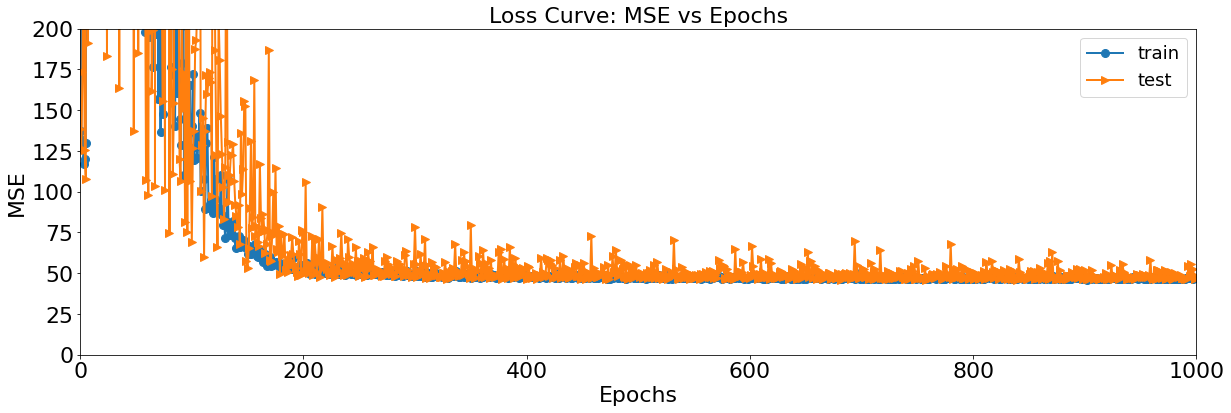

In [19]:
# Summarize history for loss = MSE
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(hist.history['loss'],'-o',linewidth=2, markersize=8)
plt.plot(hist.history['val_loss'],'->',linewidth=2, markersize=8)
plt.title('Loss Curve: MSE vs Epochs',fontsize=22)
plt.ylabel('MSE',fontsize=22)
#plt.grid()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Epochs',fontsize=22)
plt.legend(['train', 'test'], loc='upper right',fontsize=18)
plt.axis([0,1000,0,200])
plt.show()

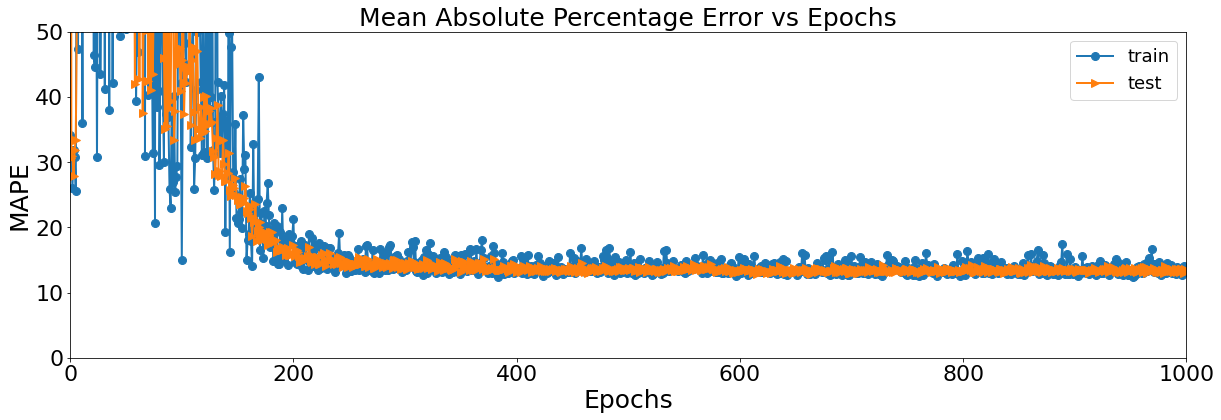

In [20]:
#-Summarize history for MAPE
plt.figure(figsize=(20,6))
plt.plot(hist.history['val_mape'],'-o',linewidth=2, markersize=8)
plt.plot(hist.history['mape'],'->',linewidth=2, markersize=8)
plt.title('Mean Absolute Percentage Error vs Epochs',fontsize=25)
plt.ylabel('MAPE',fontsize=25)
plt.xlabel('Epochs',fontsize=25)
plt.legend(['train', 'test'], loc='upper right',fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.axis([0,1000,0,50])
plt.show()

## Save the results

In [21]:
col = ['rho','E1','E2','G12','v12','v23']
df1a = pd.DataFrame(apdSVM1a,columns=col)
df2a = pd.DataFrame(apdSVM2a,columns=col)
df3a = pd.DataFrame(apdSVM3a,columns=col)
df4a = pd.DataFrame(apdLR1a,columns=col)
df5a = pd.DataFrame(apdLR2a,columns=col)
df6a = pd.DataFrame(apdLR3a,columns=col)
df7a = pd.DataFrame(apdRF1,columns=col)
df8a = pd.DataFrame(apdANN1,columns=col)

df1b = pd.DataFrame(apdSVM1b,columns=col)
df2b = pd.DataFrame(apdSVM2b,columns=col)
df3b = pd.DataFrame(apdSVM3b,columns=col)
df4b = pd.DataFrame(apdLR1b,columns=col)
df5b = pd.DataFrame(apdLR2b,columns=col)
df6b = pd.DataFrame(apdLR3b,columns=col)
df7b = pd.DataFrame(apdRF2,columns=col)
df8b = pd.DataFrame(apdANN2,columns=col)

df1a.to_excel('apdSVM1a.xlsx',index=False)
df2a.to_excel('apdSVM2a.xlsx',index=False)
df3a.to_excel('apdSVM3a.xlsx',index=False)
df4a.to_excel('apdLR1a.xlsx',index=False)
df5a.to_excel('apdLR2a.xlsx',index=False)
df6a.to_excel('apdLR3a.xlsx',index=False)
df7a.to_excel('apdRF1.xlsx',index=False)
df8a.to_excel('apdANN1.xlsx',index=False)

df1b.to_excel('apdSVM1b.xlsx',index=False)
df2b.to_excel('apdSVM2b.xlsx',index=False)
df3b.to_excel('apdSVM3b.xlsx',index=False)
df4b.to_excel('apdLR1b.xlsx',index=False)
df5b.to_excel('apdLR2b.xlsx',index=False)
df6b.to_excel('apdLR3b.xlsx',index=False)
df7b.to_excel('apdRF2.xlsx',index=False)
df8b.to_excel('apdANN2.xlsx',index=False)